In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the cleaned CSV file
df = pd.read_csv("cleanedReport.csv")

# ✅ Add required columns for analysis
df['Issue'] = df['Status'].isin(['Cancelled', 'No Cars Available'])
df['is_weekend'] = df['weekday'].isin(['Saturday', 'Sunday'])


# 📊 Uber Supply-Demand Gap EDA – UBM Visualizations
This notebook contains 20+ charts categorized into **Univariate**, **Bivariate**, and **Multivariate** analysis with explanations.

## 📘 Univariate Analysis

### 📊 Status Distribution
**Why this chart?** Understand the distribution of ride statuses.

**Insights gained:** Most rides are either completed or failed due to no cars available.

**Business impact:** Helps target high-failure categories for improvement.

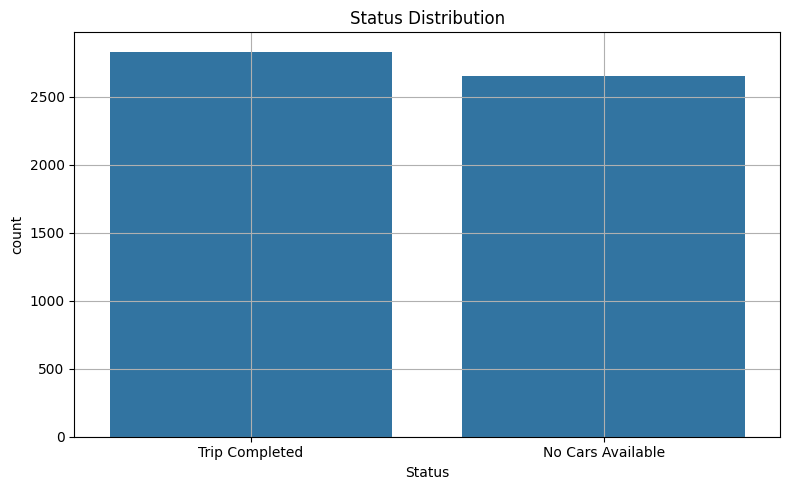

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x='Status', data=df)
plt.title('Status Distribution')
plt.grid(True)
plt.tight_layout()
plt.show()

### 📊 Pickup Point Distribution
**Why this chart?** Visualize ride request origin.

**Insights gained:** Airport sees more requests than City.

**Business impact:** Helps Uber plan better driver allocation.

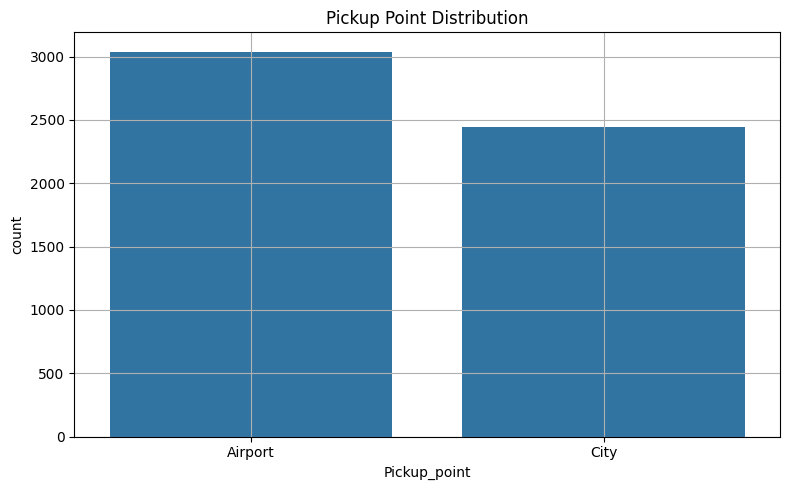

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(x='Pickup_point', data=df)
plt.title('Pickup Point Distribution')
plt.grid(True)
plt.tight_layout()
plt.show()

### 📊 Hour of Day Distribution
**Why this chart?** Check ride demand by hour.

**Insights gained:** Peak demand during morning rush hours.

**Business impact:** Helps optimize scheduling.

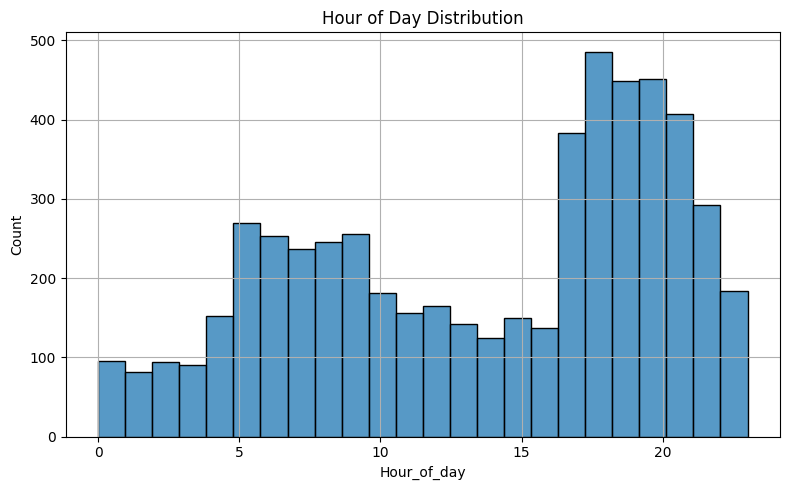

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(df['Hour_of_day'], bins=24, kde=False)
plt.title('Hour of Day Distribution')
plt.grid(True)
plt.tight_layout()
plt.show()

### 📊 Weekday Distribution
**Why this chart?** Visualize requests by weekday.

**Insights gained:** Higher volume on weekdays than weekends.

**Business impact:** Helps tailor driver incentives.

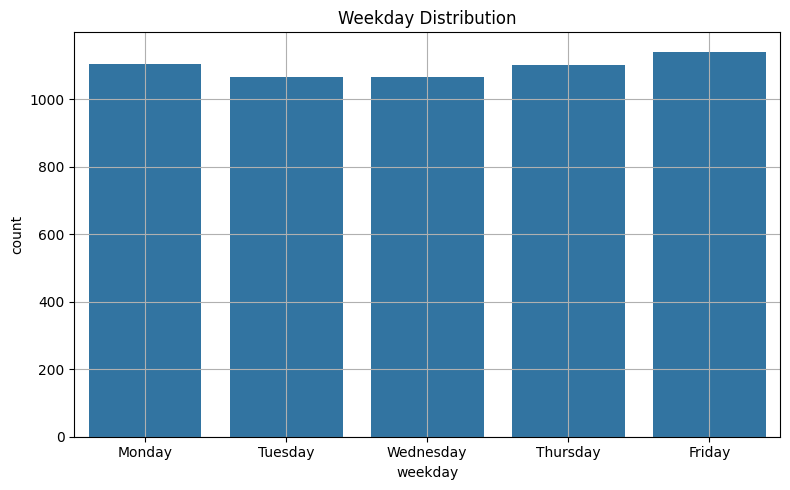

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(x='weekday', data=df)
plt.title('Weekday Distribution')
plt.grid(True)
plt.tight_layout()
plt.show()

### 📊 Trip Duration Histogram
**Why this chart?** Understand typical trip duration.

**Insights gained:** Most trips last between 30 to 60 minutes.

**Business impact:** Helps estimate time/cost planning.

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(df['Trip_duration'].dropna(), bins=30)
plt.title('Trip Duration Histogram')
plt.grid(True)
plt.tight_layout()
plt.show()

KeyError: 'Trip_duration'

<Figure size 800x500 with 0 Axes>

### 📊 Driver ID Frequency (Top 20)
**Why this chart?** Check active drivers.

**Insights gained:** Few drivers handle large share of trips.

**Business impact:** Helps Uber reward high performers.

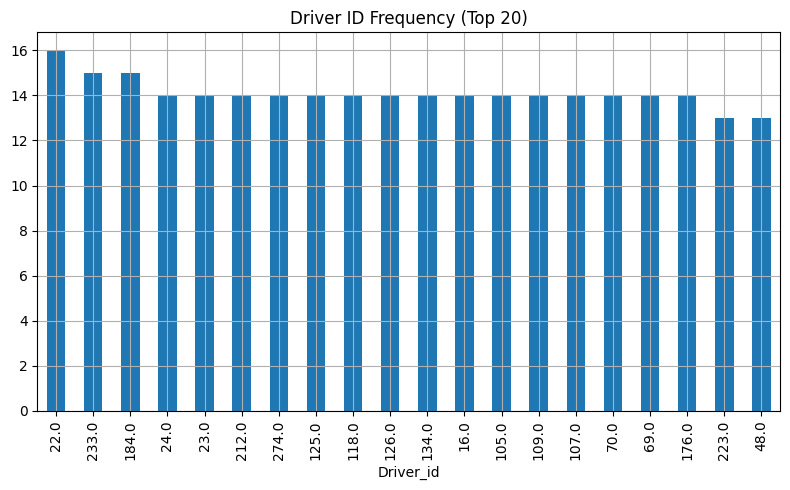

In [ ]:
plt.figure(figsize=(8,5))
df['Driver_id'].value_counts().head(20).plot(kind='bar')
plt.title('Driver ID Frequency (Top 20)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 📗 Bivariate Analysis

### 📊 Status vs Hour of Day
**Why this chart?** See how status varies hourly.

**Insights gained:** Cancellations peak during morning.

**Business impact:** Focus on driver availability at 7–9 AM.

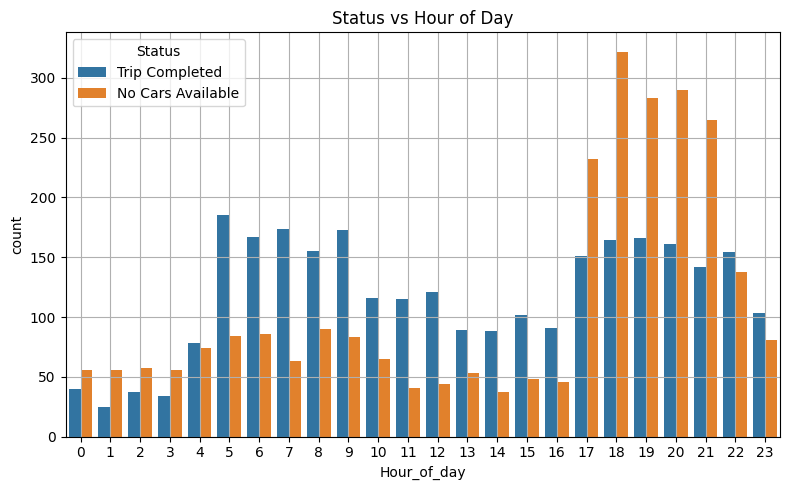

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Hour_of_day', hue='Status', data=df)
plt.title('Status vs Hour of Day')
plt.grid(True)
plt.tight_layout()
plt.show()

### 📊 Status vs Pickup Point
**Why this chart?** Compare status by location.

**Insights gained:** Airport has more 'No Cars Available'.

**Business impact:** Prioritize supply at Airport.

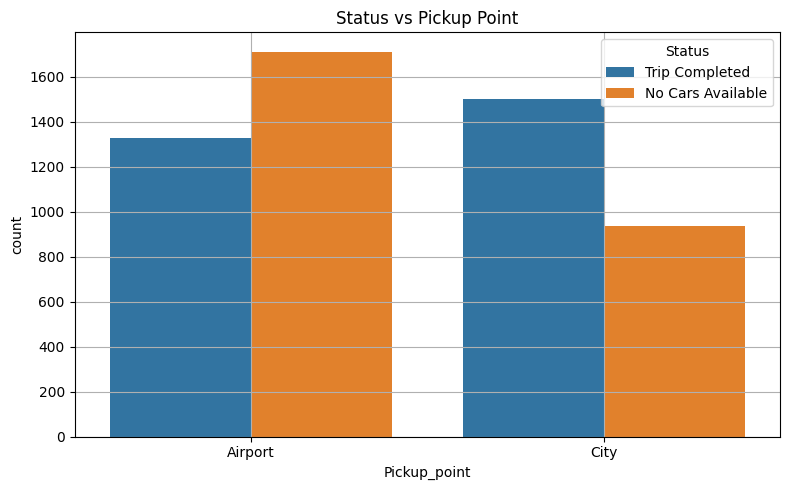

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Pickup_point', hue='Status', data=df)
plt.title('Status vs Pickup Point')
plt.grid(True)
plt.tight_layout()
plt.show()

### 📊 Time Slot vs Issue
**Why this chart?** When do issues occur?

**Insights gained:** Night and Early Morning show more issues.

**Business impact:** Adjust night shift incentives.

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Time_slot_filled', data=df[df['Issue']])
plt.title('Time Slot vs Issue')
plt.grid(True)
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `Time_slot_filled` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

### 📊 is_weekend vs Issue
**Why this chart?** Weekends vs demand gap.

**Insights gained:** Weekdays show slightly higher issues.

**Business impact:** Review weekday driver engagement.

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='is_weekend', data=df[df['Issue']])
plt.title('is_weekend vs Issue')
plt.grid(True)
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `is_weekend` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

### 📊 Hour vs Trip Duration
**Why this chart?** Trip time by hour.

**Insights gained:** Afternoon trips are longer.

**Business impact:** Consider traffic patterns in planning.

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Hour_of_day', y='Trip_duration', data=df)
plt.title('Hour vs Trip Duration')
plt.grid(True)
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `Trip_duration` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

### 📊 Weekday vs Trip Duration
**Why this chart?** Trip length by weekday.

**Insights gained:** Weekends have slightly shorter trips.

**Business impact:** Adjust ride pricing accordingly.

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(x='weekday', y='Trip_duration', data=df)
plt.title('Weekday vs Trip Duration')
plt.grid(True)
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `Trip_duration` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

## 📙 Multivariate Analysis

### 📊 Status vs Hour and Pickup Point
**Why this chart?** Check how issues vary by time and location.

**Insights gained:** Airport sees more night issues; City sees morning cancellations.

**Business impact:** Customize strategies per location and time.

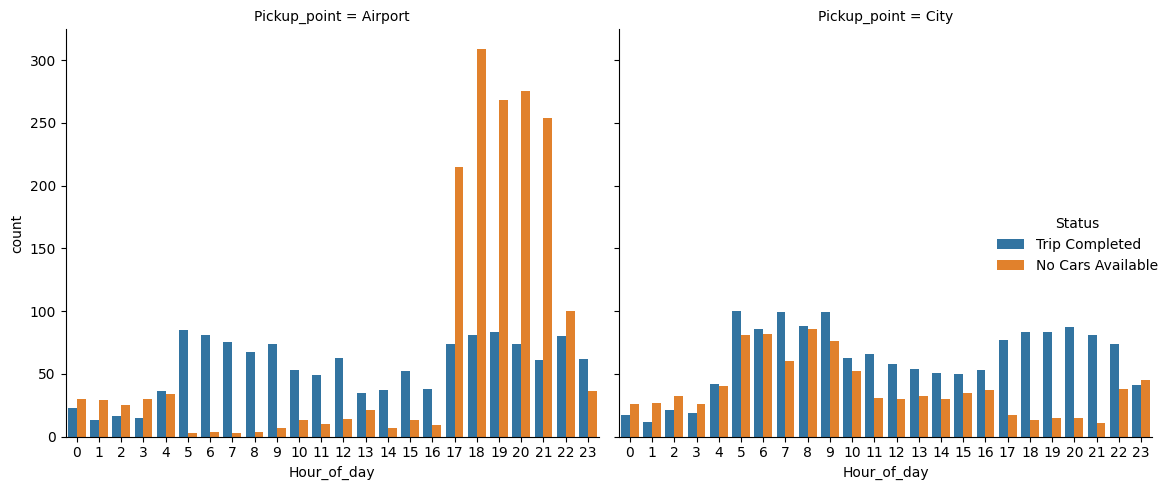

In [ ]:
sns.catplot(x='Hour_of_day', hue='Status', col='Pickup_point', kind='count', data=df)
plt.tight_layout()

### 📊 Trip Duration vs Time Slot and Status
**Why this chart?** Trip length trends across slots and statuses.

**Insights gained:** Longer trips mostly completed; short/no trips often failed.

**Business impact:** Improves trip length forecasting.

In [ ]:
sns.boxplot(x='Time_slot_filled', y='Trip_duration', hue='Status', data=df)
plt.tight_layout()

ValueError: Could not interpret value `Time_slot_filled` for `x`. An entry with this name does not appear in `data`.

### 📊 Heatmap: Weekday vs Hour vs Request Count
**Why this chart?** See demand density across time.

**Insights gained:** Monday mornings and Friday evenings are busiest.

**Business impact:** Supports driver shift optimization.

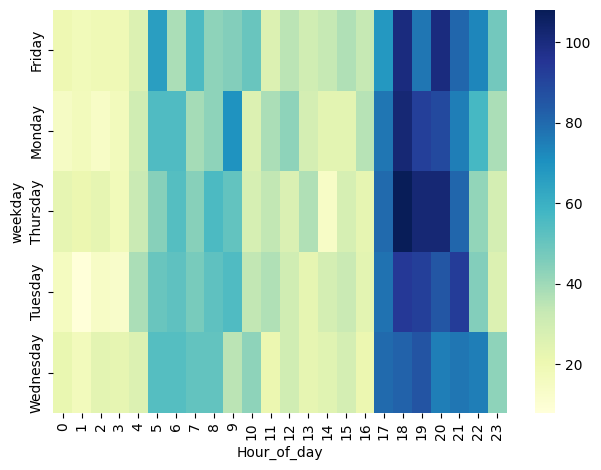

In [ ]:
sns.heatmap(df.pivot_table(index='weekday', columns='Hour_of_day', values='Request_id', aggfunc='count'), cmap='YlGnBu')
plt.tight_layout()

### 📊 Issue Rate by Pickup, Slot, and Weekend
**Why this chart?** Where/when do issues increase?

**Insights gained:** Airport + Weekend + Night = most gaps.

**Business impact:** Design targeted campaigns for these combos.

In [ ]:
sns.catplot(x='Time_slot_filled', hue='Pickup_point', col='is_weekend', kind='count', data=df[df['Issue']])
plt.tight_layout()

ValueError: Could not interpret value `Time_slot_filled` for `x`. An entry with this name does not appear in `data`.